#### Question 1

- For calculating the number of operations in matrix multiplication, we can breakdown the multiplication into simple steps. So for instance the first step in the multiplication would be to multiply the first row of the first matrix with the first coloumn of the second matrix element-by-element.
- Since the first matrix is <font color = 'red'>(n,k)</font>, the first row would contain <font color = 'blue'>k</font> elements. Similarly, the second matrix is <font color = 'red'>(k,m)</font>, so the number of elements in the first column is also <font color = 'blue'>k</font>.
- So when we multiply them element-by-element, we get a total of <font color = 'blue'>k</font> multiplications. And since there are <font color = 'blue'>k</font> elements that are to be added, we would need <font color = 'blue'>(k-1)</font> additions.
- Now since we have considered only 1 row and 1 column we get <font color = 'blue'>k</font> multiplications, but originally we have <font color = 'blue'>n</font> rows and <font color = 'blue'>m</font> coloumns that are needed to be multiplied. Hence, the total number of multiplication would be <font color = 'red'>(n x m x k)</font> and the total number of additions would be <font color = 'red'>(n x m x (k-1))</font>.

#### Question 2

In [10]:
import numpy as np
import time

def matrix_multiplication_python(matrix1, matrix2):
    row_m1 = len(matrix1)
    col_m1 = len(matrix1[0])
    row_m2 = len(matrix2)
    col_m2 = len(matrix2[0])
    
    if col_m1 != row_m2:
        raise ValueError("The given matrix are not compatible for matrix multiplication")

    #initializing result matrix
    result_1 = [[0 for x in range(col_m2)] for y in range(row_m1)]

    #multiplying the matrices
    for i in range(row_m1):
        for j in range(col_m2):
            for k in range(col_m1):
                result_1[i][j] += matrix1[i][k] * matrix2[k][j]
    
    return result_1

def matrix_multiplication_numpy(matrix1, matrix2):
    np_matrix1 = np.array(matrix1)
    np_matrix2 = np.array(matrix2)
    result_2 = np.matmul(np_matrix1, np_matrix2)
    return result_2

# Example matrices
matrix1 = [
    [1, 2, 3],
    [4, 5, 6]
]

matrix2 = [
    [7, 8],
    [9, 10],
    [11, 12]
]

# Timing Python list implementation
start_time = time.time()
result_python = matrix_multiplication_python(matrix1, matrix2)
end_time = time.time()
print("Python implementation took:", end_time - start_time, "seconds")

# Timing numpy implementation
start_time = time.time()
result_numpy = matrix_multiplication_numpy(matrix1, matrix2)
end_time = time.time()
print("numpy implementation took:", end_time - start_time, "seconds")


Python implementation took: 0.0 seconds
numpy implementation took: 0.0 seconds


- In the example demonstrated above, there seems to be no difference in the time taken by each of the implementation. This is because the example taken is a very small matrix.
- As soon as the size of the matrix becomes large, numpy will have better performance due the following reasons:-
  1. numpy is based on highly optimized C and Fortran libraries, hence it is much more optimized to for such operations as compared to native Python lists.
  2. numpy has better memory management because the it stores the elements in contiguous blocks of memory which leads to faster access and manipulation.

#### Question 4

The gradient of a function $z=f(x,y)$ w.r.t $x$:
    $$=\frac{\partial}{\partial x} f(x,y)$$

The function given to us is $x^2 y + y^3 sin(x)$
So we have:
    $$\frac{\partial}{\partial x} f(x,y) = \text{  }\frac{\partial}{\partial x} (x^2 y + y^3 sin(x))$$
    $$= \text{  } 2xy + y^3 cos(x) $$

The gradient of a function $z=f(x,y)$ w.r.t $y$:
    $$=\frac{\partial}{\partial y} f(x,y)$$

The function given to us is $x^2 y + y^3 sin(x)$
So we have:
    $$\frac{\partial}{\partial y} f(x,y) = \text{  }\frac{\partial}{\partial y} (x^2 y + y^3 sin(x))$$
    $$= \text{  } x^2 + 3y^2 sin(x) $$


#### Question 5

In [32]:
import jax
import jax.numpy as jnp

# Given function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Gradient w.r.t x
grad_f_x = jax.grad(f, argnums=0)

# Gradient w.r.t y
grad_f_y = jax.grad(f, argnums=1)

# Gradient for x=1 and y=2
x = 1.0
y = 2.0

grad_x_value = grad_f_x(x_value, y_value)
grad_y_value = grad_f_y(x_value, y_value)

print(f"The gradient of f at (x, y) = ({x_value}, {y_value}) with respect to x is {grad_x_value}")
print(f"The gradient of f at (x, y) = ({x_value}, {y_value}) with respect to y is {grad_y_value}")


The gradient of f at (x, y) = (1.0, 2.0) with respect to x is 8.322418212890625
The gradient of f at (x, y) = (1.0, 2.0) with respect to y is 11.097651481628418


We calculated the gradient of $f(x,y)$ in Question 4 w.r.t $x$ and $y$

For $x=1$ and $y=2$ gradient of $f(x,y)$ w.r.t $x$: 
    $$= \text{  } 2*(1)*(2) + (2)^3 cos(1)$$
    $$= \text{ } 8.32241844694$$

For $x=1$ and $y=2$ gradient of $f(x,y)$ w.r.t $y$:
    $$= \text{  } (1)^2 + 3*(2)^2 sin(1) $$
    $$= \text{ } 11.0976518176$$

So, we can observe that the answers obtained from both the methods come out to be very close to each other.

#### Question 6

In [34]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient
gradient_f = [sp.diff(f, var) for var in (x, y)]

# Evaluate the gradient at a specific point
x_value = 1.0
y_value = 2.0
grad_values = [grad.subs({x: x_value, y: y_value}) for grad in gradient_f]

print(f"The gradient of f at (x, y) = ({x_value}, {y_value}) is {grad_values}")


The gradient of f at (x, y) = (1.0, 2.0) is [8.32241844694512, 11.0976518176948]


So we can observe that the gradient obtained from sympy comes out to be same as the result that we got from analytical method.

#### Question 9

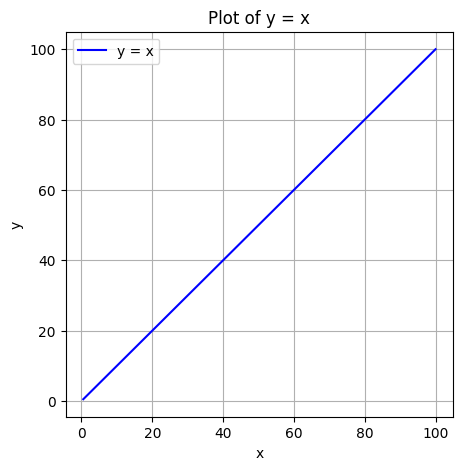

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.5, 0.5)

# Calculate y values
y = x

# Create the plot
plt.figure(figsize=(5, 5))
plt.plot(x, y, label='y = x', color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()



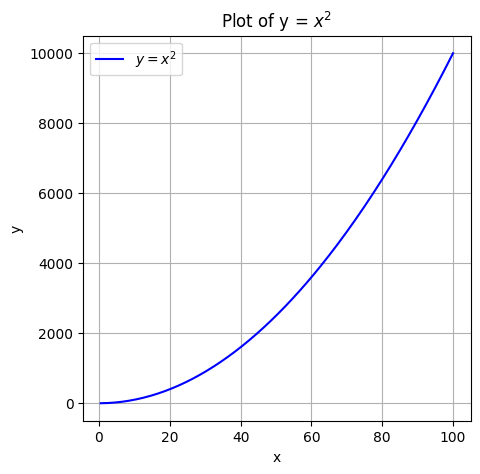

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.5, 0.5)

# Calculate y values
y = x**2

# Create the plot
plt.figure(figsize=(5, 5))
plt.plot(x, y, label=r'$y = x^2$', color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = $x^2$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

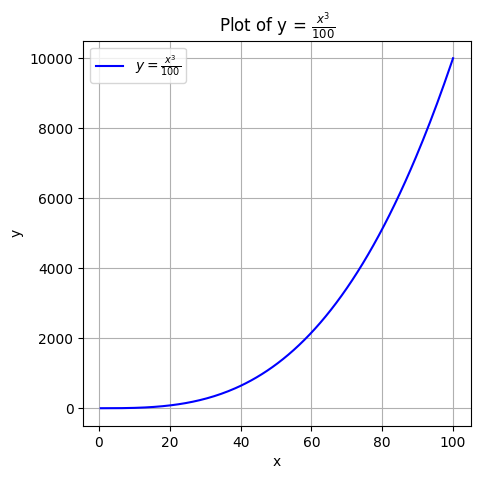

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.5, 0.5)

# Calculate y values
y = x**3 / 100

# Create the plot
plt.figure(figsize=(5, 5))
plt.plot(x, y, label=r'$y = \frac{x^3}{100}$', color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of y = $\frac{x^3}{100}$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

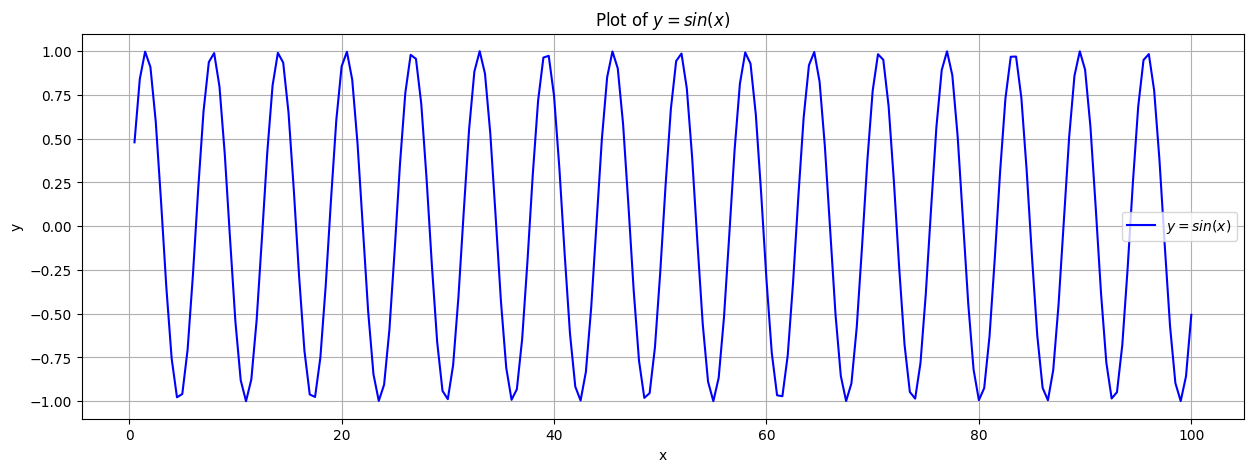

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.5, 0.5)

# Calculate y values
y = np.sin(x)

# Create the plot
plt.figure(figsize=(15, 5))
plt.plot(x, y, label=r'$y = sin(x)$', color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = sin(x)$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

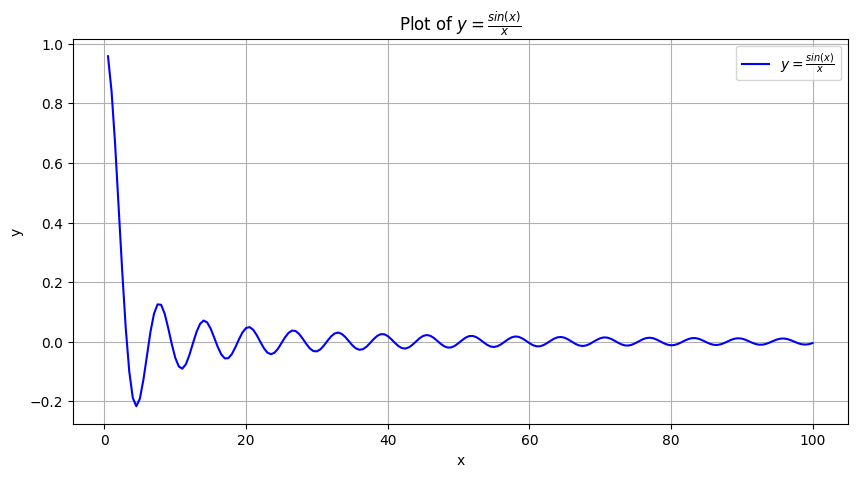

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.5, 0.5)

# Calculate y values
y = np.sin(x)/x

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label=r'$y = \frac{sin(x)}{x}$', color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = \frac{sin(x)}{x}$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

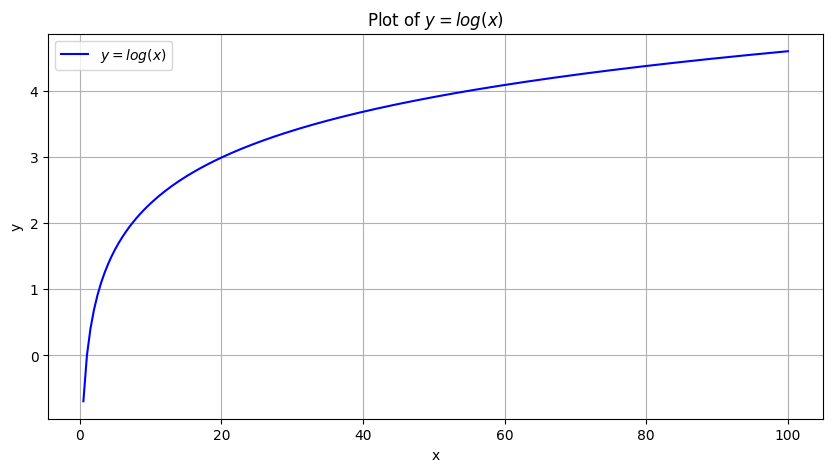

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.5, 0.5)

# Calculate y values
y = np.log(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label=r'$y = log(x)$', color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = log(x)$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

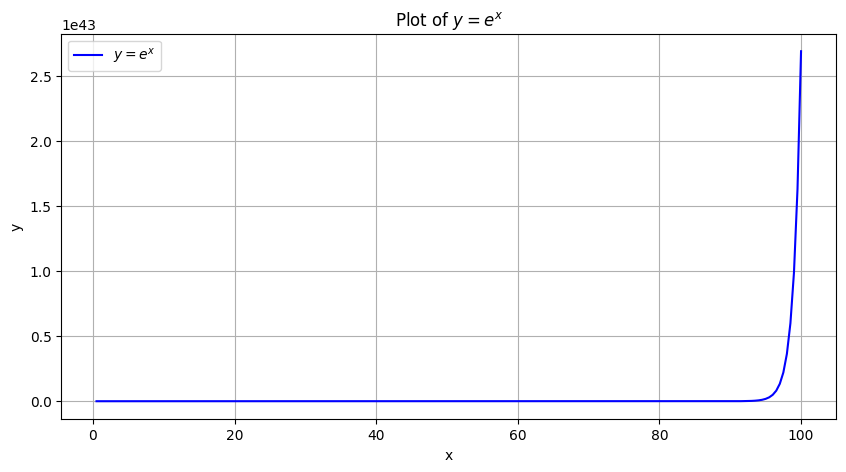

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.5, 0.5)

# Calculate y values
y = np.exp(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label=r'$y = e^x$', color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = e^x$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#### Question 10

In [70]:
import numpy as np
import pandas as pd

# Generating random 20x5 matrix
matrix = np.random.uniform(1, 2, size=(20, 5))

# Creating dataframe
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Finding the column with highest SD
std_devs = df.std()
max_std_col = std_devs.idxmax()
max_std_value = std_devs.max()

# Finding the row with lowest mean
means = df.mean(axis=1)
min_mean_row = means.idxmin()
min_mean_value = means.min()

# Print results
print("DataFrame:")
print(df)
print(f"\nColumn with the highest standard deviation: {max_std_col}, Value = {max_std_value:.4f}")
print(f"\nRow with the lowest mean: {min_mean_row}, Value: {min_mean_value:.4f}")

DataFrame:
           a         b         c         d         e
0   1.315185  1.506685  1.034190  1.304566  1.565148
1   1.267759  1.046381  1.773691  1.050788  1.435370
2   1.502477  1.633941  1.656840  1.201303  1.348831
3   1.668870  1.473372  1.937042  1.769315  1.560509
4   1.770860  1.077574  1.068527  1.847323  1.393692
5   1.651459  1.375321  1.968846  1.381411  1.727910
6   1.018354  1.456450  1.833165  1.720484  1.697344
7   1.060428  1.245165  1.999101  1.814221  1.148001
8   1.199244  1.687256  1.079537  1.405115  1.457184
9   1.892241  1.748036  1.613376  1.525050  1.065958
10  1.301841  1.221213  1.648960  1.888411  1.080204
11  1.904108  1.666930  1.284630  1.056675  1.965790
12  1.898954  1.715572  1.854555  1.712906  1.131569
13  1.676066  1.400721  1.987070  1.780419  1.575886
14  1.357806  1.567436  1.651919  1.680702  1.116576
15  1.749580  1.791063  1.880364  1.324151  1.605139
16  1.219860  1.632718  1.902022  1.429192  1.539730
17  1.606282  1.588311  1.121979  1

#### Question 11

In [72]:
import numpy as np
import pandas as pd

# Generating random 20x5 matrix
matrix = np.random.uniform(1, 2, size=(20, 5))

# Creating dataframe
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Adding column "f" 
df['f'] = df.sum(axis=1)

# Adding column "g" 
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

# Finding the number of rows where column "g" is "LT8"
lt8_count = df['g'].value_counts().get('LT8', 0)

# Calculating the SD of column "f" for rows where "g" is "LT8" and "GT8"
std_dev_lt8 = df[df['g'] == 'LT8']['f'].std()
std_dev_gt8 = df[df['g'] == 'GT8']['f'].std()

# Print results
print("DataFrame:")
print(df)
print(f"\nNumber of rows where column 'g' is 'LT8': {lt8_count}")
print()
print(f"\nStandard deviation of column 'f' where column 'g' is 'LT8': {std_dev_lt8:.4f}")
print(f"\nStandard deviation of column 'f' where column 'g' is 'GT8': {std_dev_gt8:.4f}")


DataFrame:
           a         b         c         d         e         f    g
0   1.509906  1.658798  1.103074  1.572647  1.200860  7.045285  LT8
1   1.096464  1.733871  1.424272  1.689436  1.716602  7.660644  LT8
2   1.175456  1.974698  1.594713  1.941396  1.569931  8.256195  GT8
3   1.629939  1.937327  1.003076  1.630984  1.562832  7.764158  LT8
4   1.881268  1.126138  1.153632  1.711902  1.161986  7.034926  LT8
5   1.818920  1.584567  1.538358  1.352827  1.160062  7.454733  LT8
6   1.775375  1.308390  1.650077  1.533965  1.706023  7.973830  LT8
7   1.208820  1.109048  1.744742  1.521739  1.835765  7.420114  LT8
8   1.118514  1.833892  1.882573  1.034805  1.262113  7.131897  LT8
9   1.676539  1.884757  1.232574  1.551799  1.930517  8.276186  GT8
10  1.264444  1.909986  1.760577  1.904196  1.005866  7.845069  LT8
11  1.359644  1.004229  1.622517  1.689404  1.796316  7.472110  LT8
12  1.154834  1.559353  1.784464  1.537061  1.484293  7.520005  LT8
13  1.807417  1.020854  1.179581  1.4

#### Question 12

Broadcasting in numpy is a feature which allows to operate on arrays having different size. But there are some rules which need to be satisfied in order for matrices to be compatible with broadcasting.
<br><br>
Rule 1: The arrays are compatible if starting from the trailing dimension, the size of each dimension is either the same or one of them is 1.
<br>
Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
<br><br>
If none of these two conditions are met, the arrays are not compatible with broadcasting.
<br>
e.g. for compatible shapes: $(6,3)$ and $(3,)$
                            $(4,1)$ and $(1,7)$
<br>
e.g. for incompatible shapes: $(5,6)$ and $(6,5)$
                              $(6,7,8)$ and $(7,8)$

In [75]:
import numpy as np

matrix_1 = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

matrix_2 = np.array([0, 1, 0])

#broadcasting
result = matrix_1 + matrix_2

print("Matrix:")
print(matrix_1)
print("\nVector:")
print(matrix_2)
print("\nResult of matrix + vector:")
print(result)


Matrix:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Vector:
[0 1 0]

Result of matrix + vector:
[[ 1  3  3]
 [ 4  6  6]
 [ 7  9  9]
 [10 12 12]]


#### Question 13

In [79]:
import numpy as np

def custom_argmin(arr):
    if len(arr) == 0:
        raise ValueError("The input array is empty")
    
    index = 0
    min_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            index = i
    
    return index

array = np.array([5,2,9,23,-5,0,-30])

# Using our implementation
our_index = custom_argmin(array)
print(f"Index using our implementation: {our_index}")

# Using np.argmin 
numpy_index = np.argmin(array)
print(f"Index using numpy argmin: {numpy_index}")


Index using our implementation: 6
Index using numpy argmin: 6
